In [86]:
from subprocess import check_output
import os
cwd = os.getcwd()
print(cwd)
print(os.listdir("../data/sherbank-housing"))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt

C:\Users\faiza\Documents\GitHub\data-science\kaggle\sherbank-housing
['data_dictionary.txt', 'macro.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [10]:
df = pd.read_csv("../data/sherbank-housing/train.csv")

df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


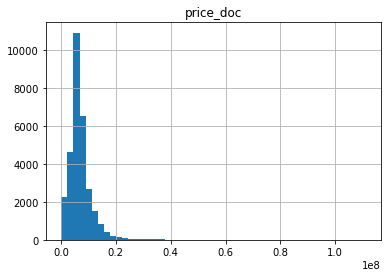

In [15]:
df.hist(column='price_doc', bins=50)
plt.show();

In [44]:
print(df["price_doc"].mean())
print(df["price_doc"].median())
print(df.count())

7123035.27773949
6274411.0
id                                       30471
timestamp                                30471
full_sq                                  30471
life_sq                                  24088
floor                                    30304
max_floor                                20899
material                                 20899
build_year                               16866
num_room                                 20899
kitch_sq                                 20899
state                                    16912
product_type                             30471
sub_area                                 30471
area_m                                   30471
raion_popul                              30471
green_zone_part                          30471
indust_part                              30471
children_preschool                       30471
preschool_quota                          23783
preschool_education_centers_raion        30471
children_school                  

In [107]:
df.columns.values

array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion',
       'detention_facility_raion', 'full_all', 'male_f', 'female_f',
       'young_all', 'young_male', 'young

### Scatter plots 

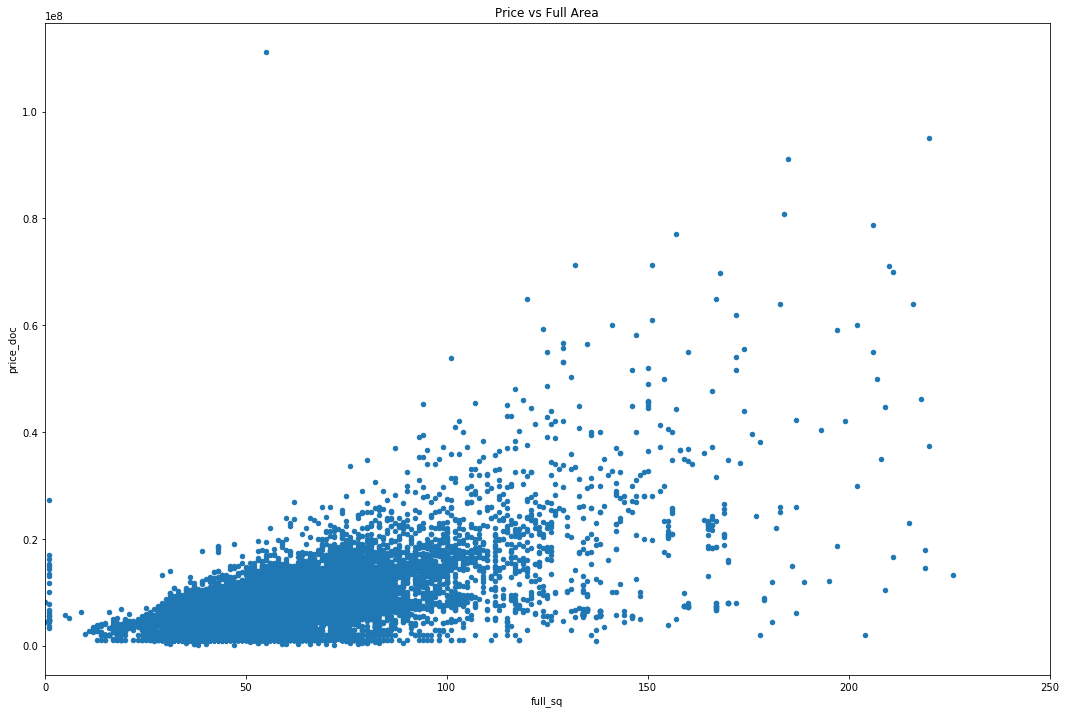

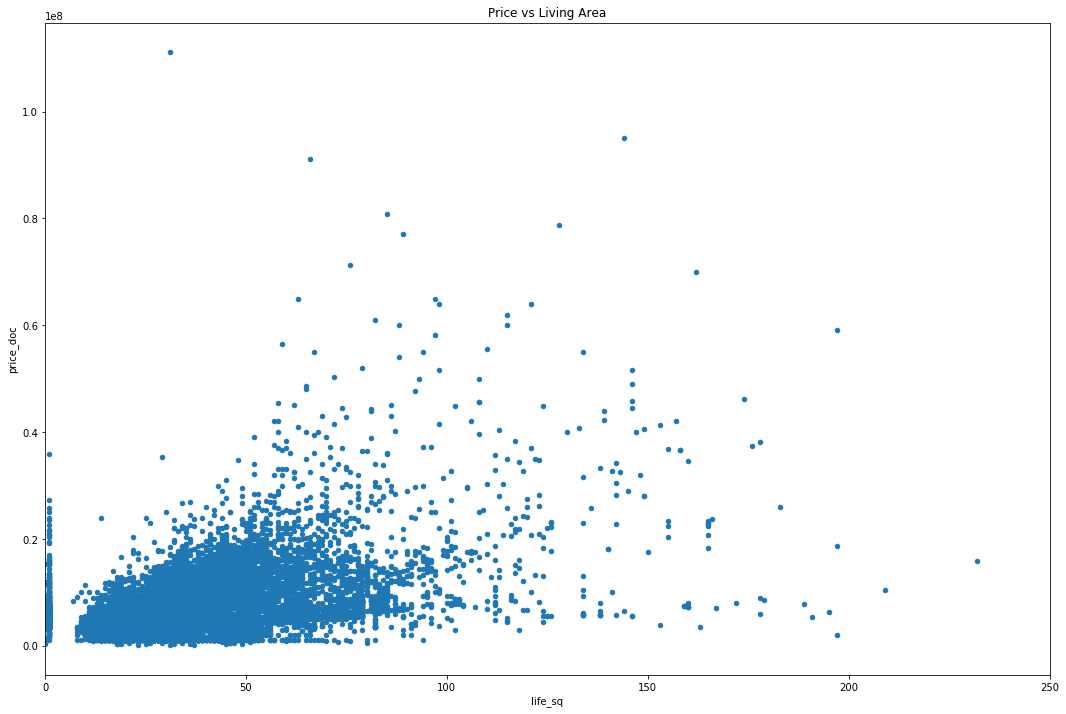

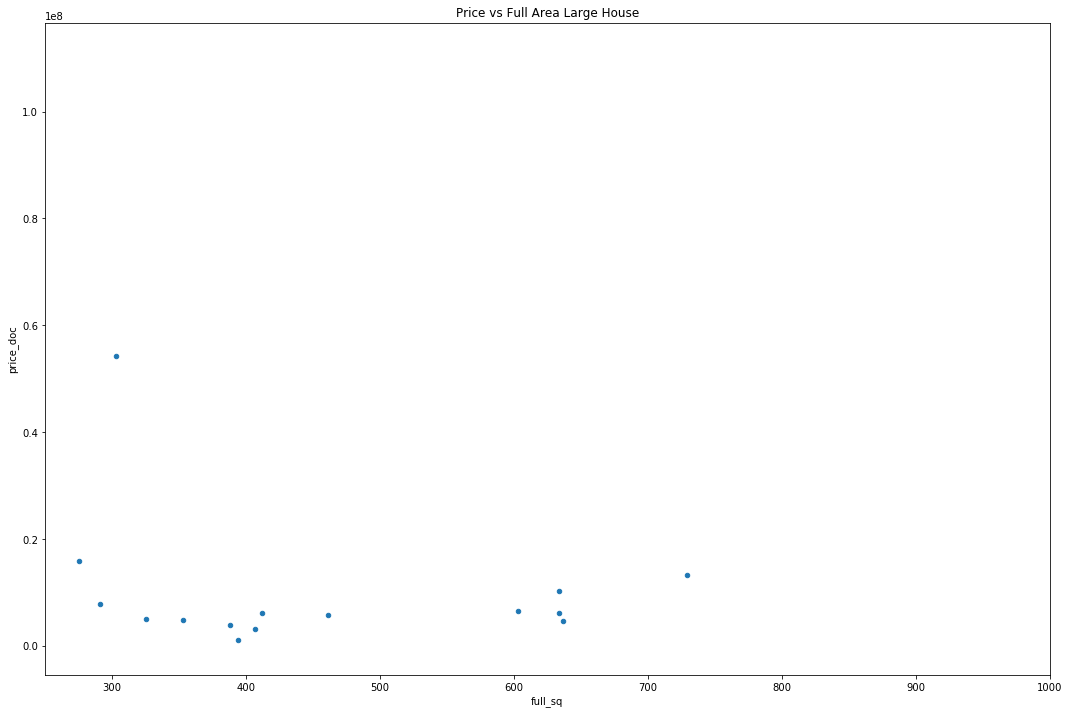

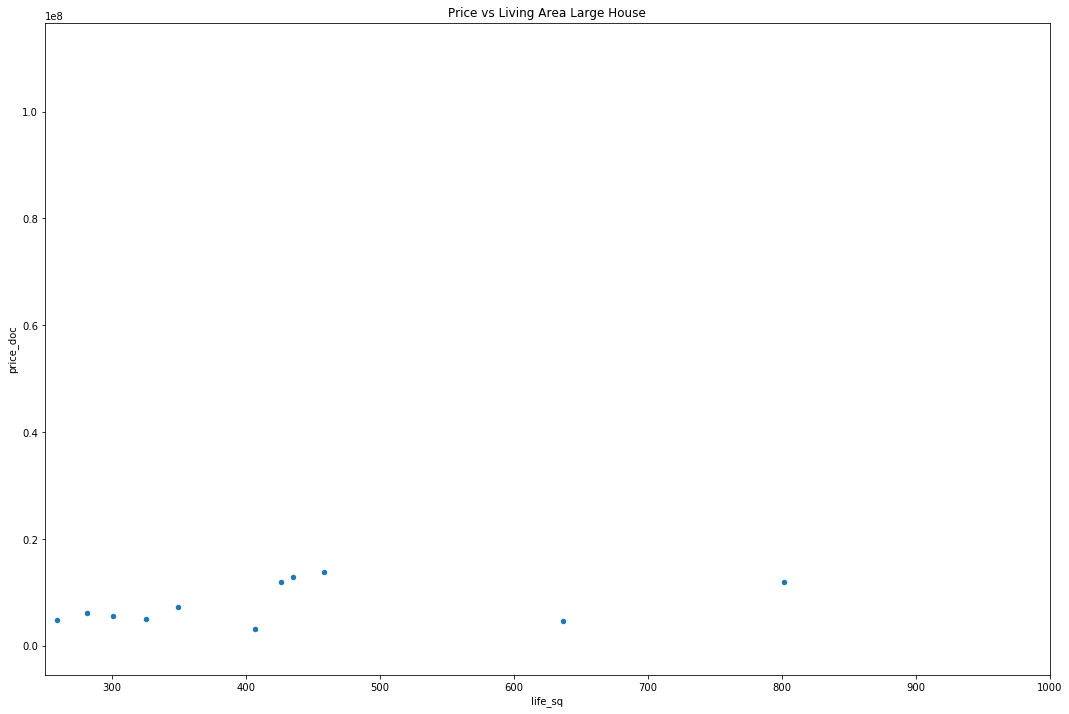

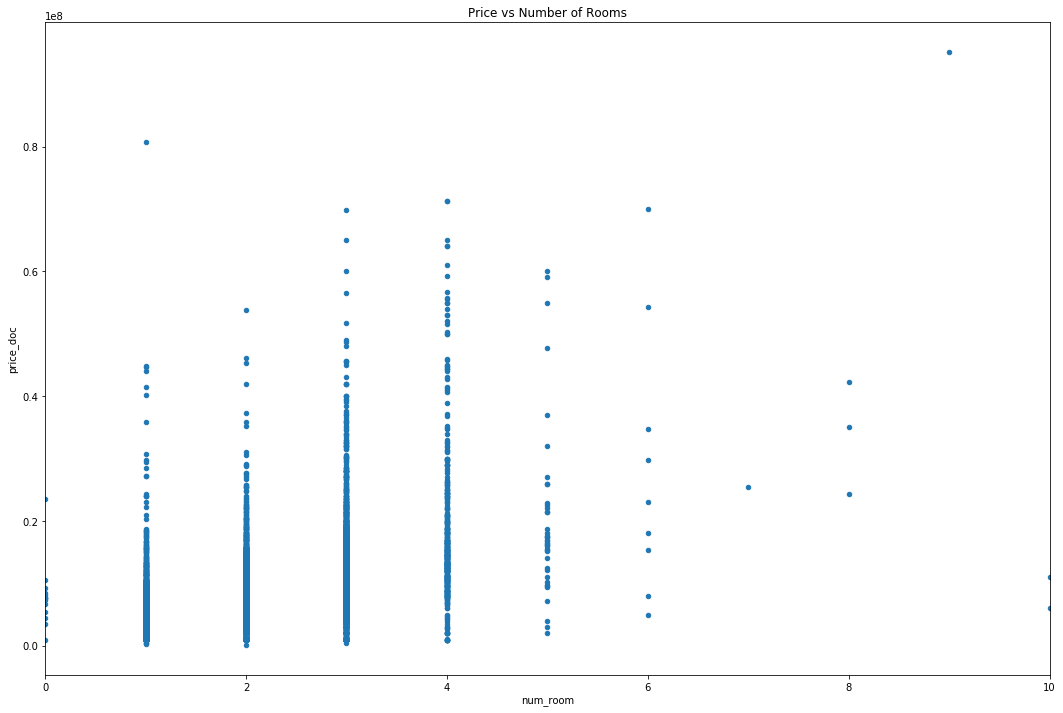

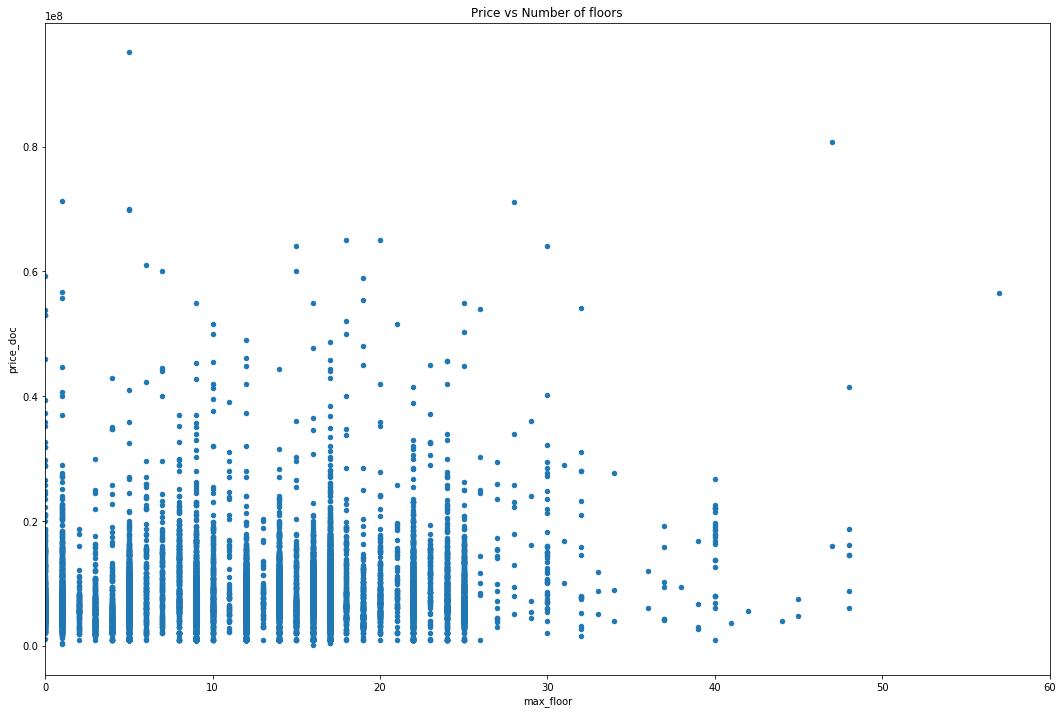

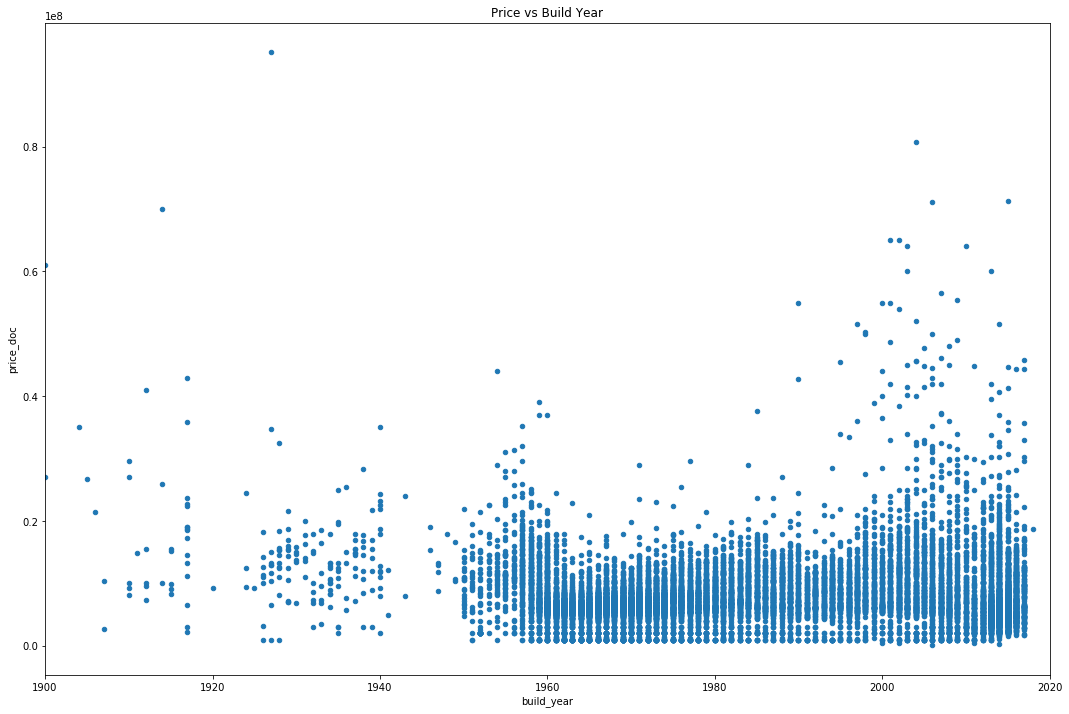

In [116]:
df.plot.scatter(x='full_sq', y='price_doc',xlim=[0,250],title="Price vs Full Area")
df.plot.scatter(x='life_sq', y='price_doc',xlim=[0,250],title="Price vs Living Area")

df.plot.scatter(x='full_sq', y='price_doc',xlim=[250,1000],title="Price vs Full Area Large House")
df.plot.scatter(x='life_sq', y='price_doc',xlim=[250,1000],title="Price vs Living Area Large House")

df.plot.scatter(x='num_room', y='price_doc',xlim=[0,10],title="Price vs Number of Rooms")

df.plot.scatter(x='max_floor', y='price_doc',xlim=[0,60],title="Price vs Number of floors")
df.plot.scatter(x='build_year', y='price_doc',xlim=[1900,2020],title="Price vs Build Year")


mplt.rcParams['figure.figsize'] = (18,12)
plt.figure();
plt.show();

### Goodness of Locality or Poshness

In [92]:
df["full_sq"].describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

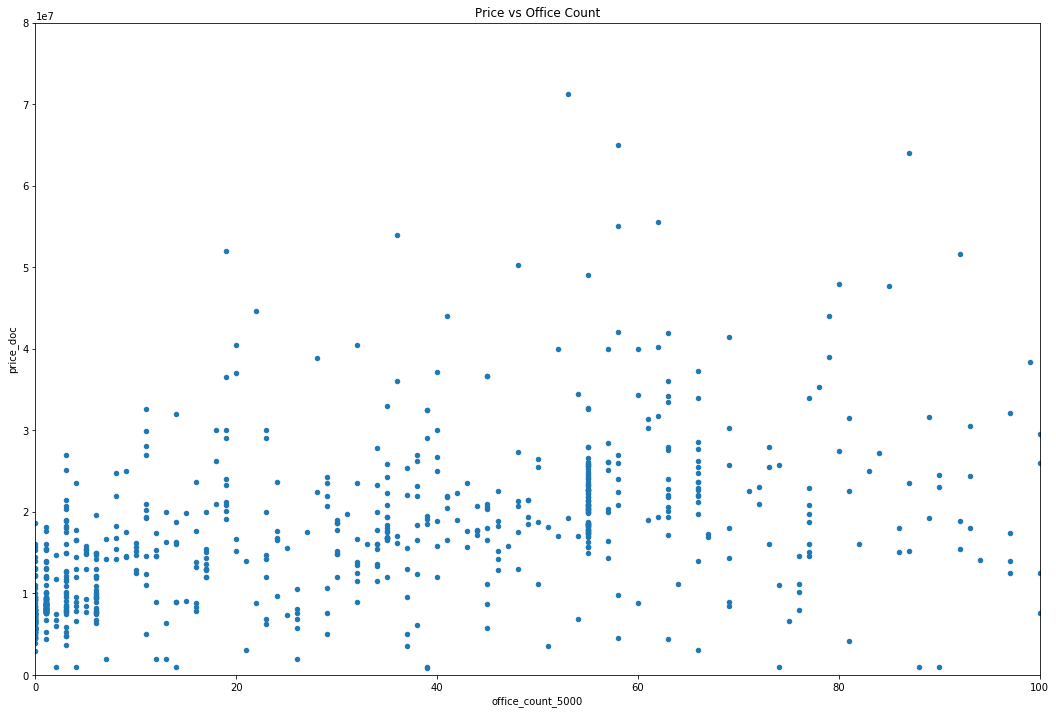

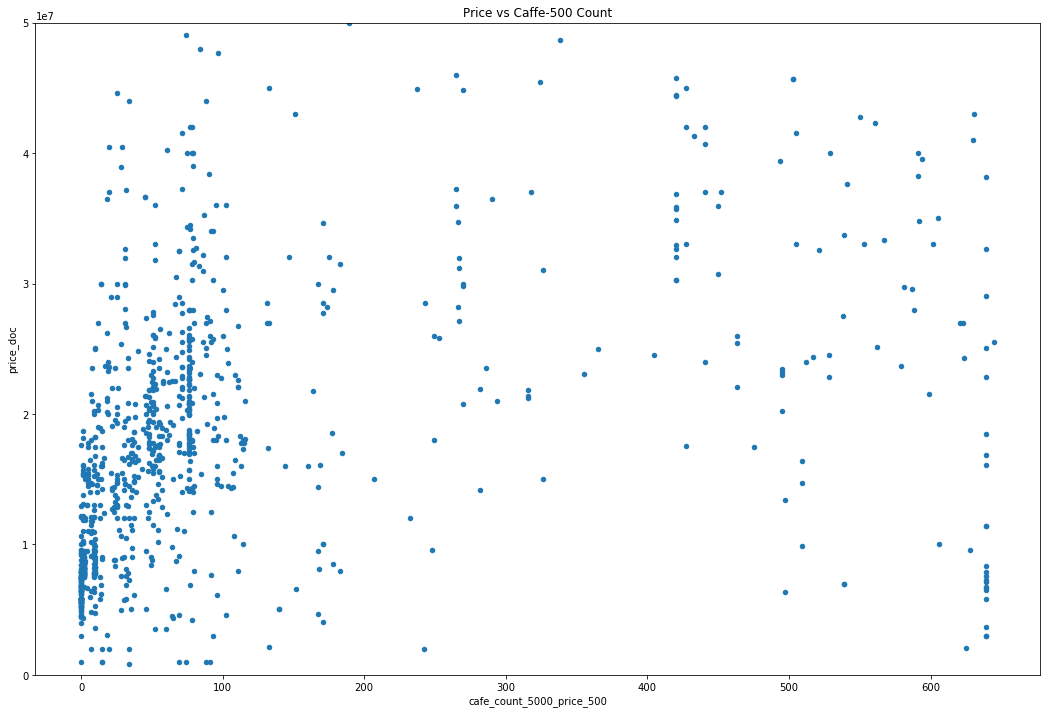

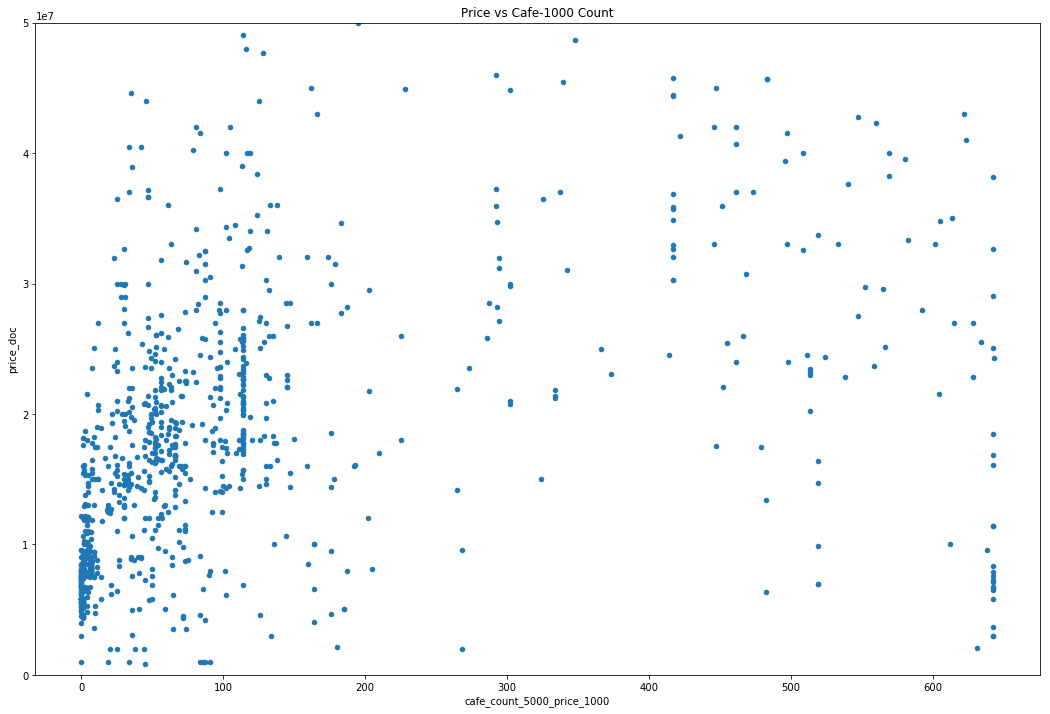

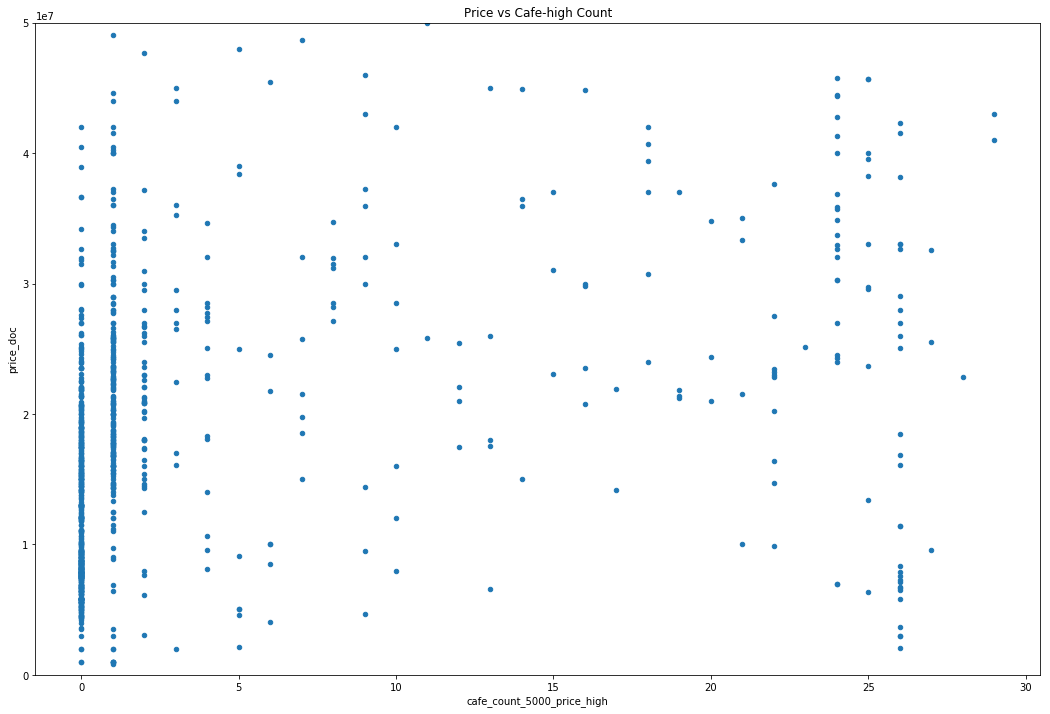

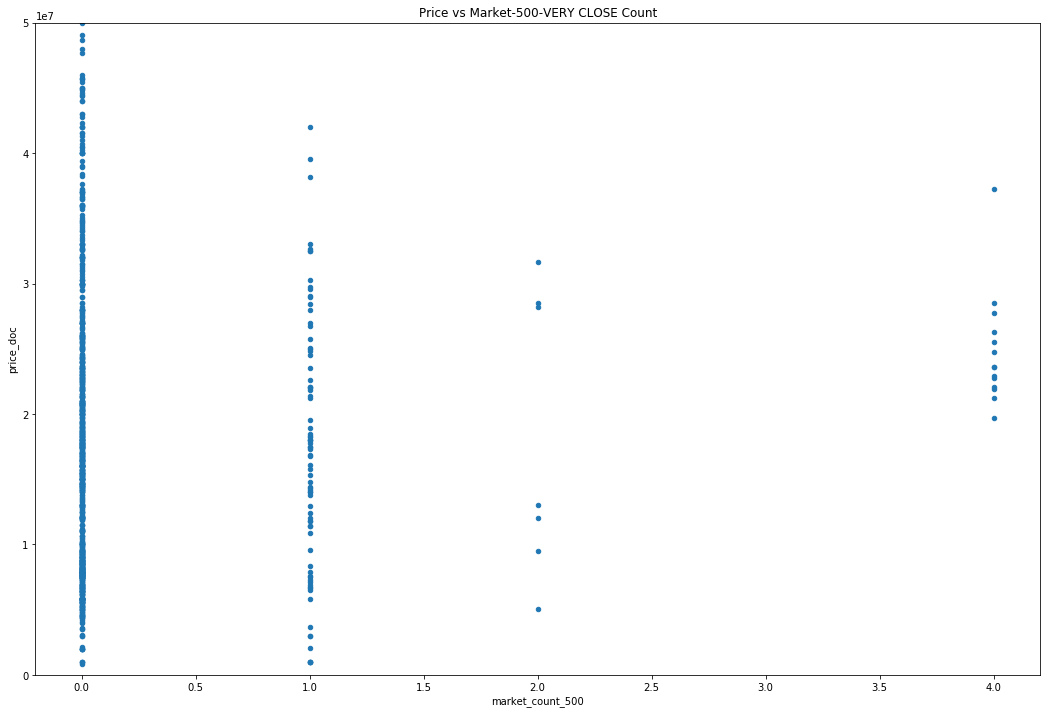

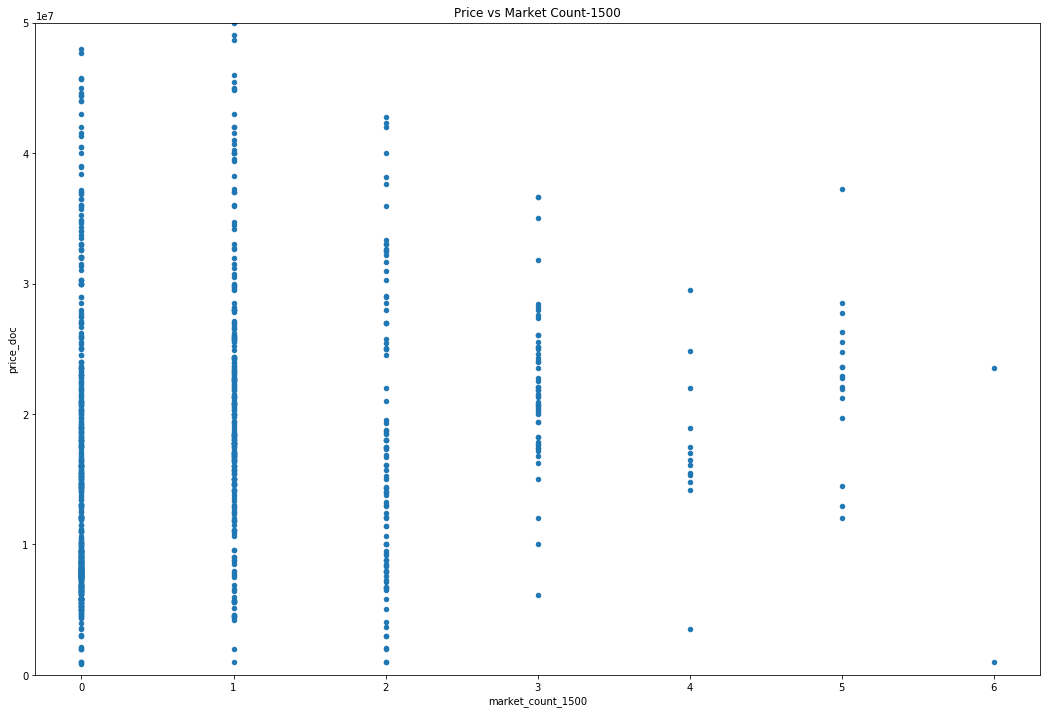

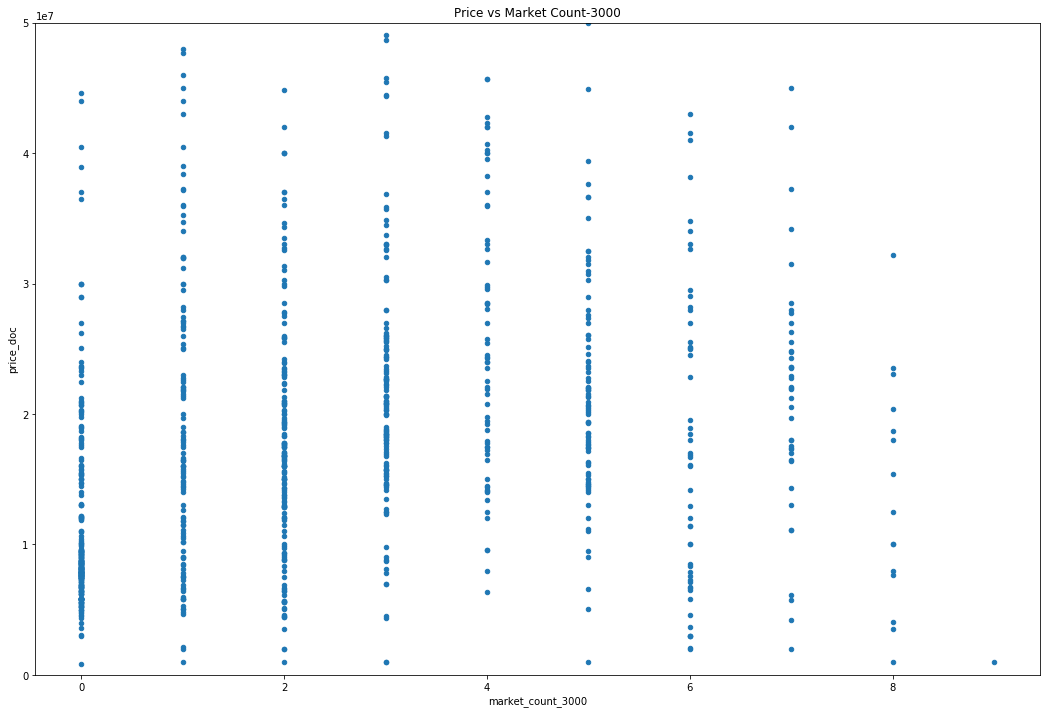

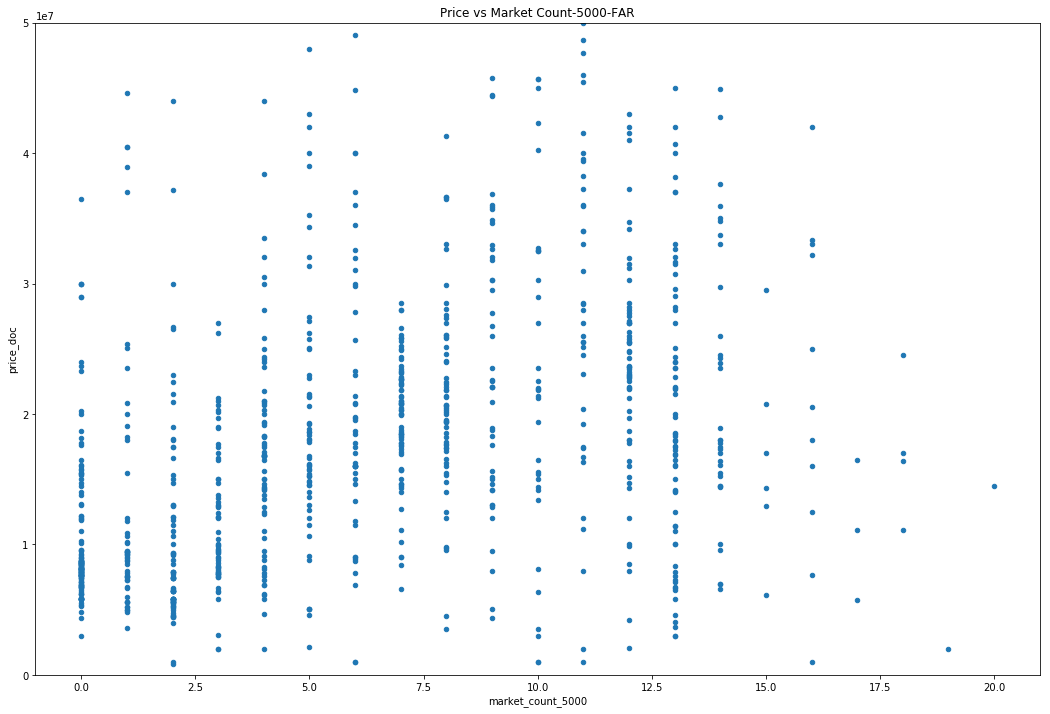

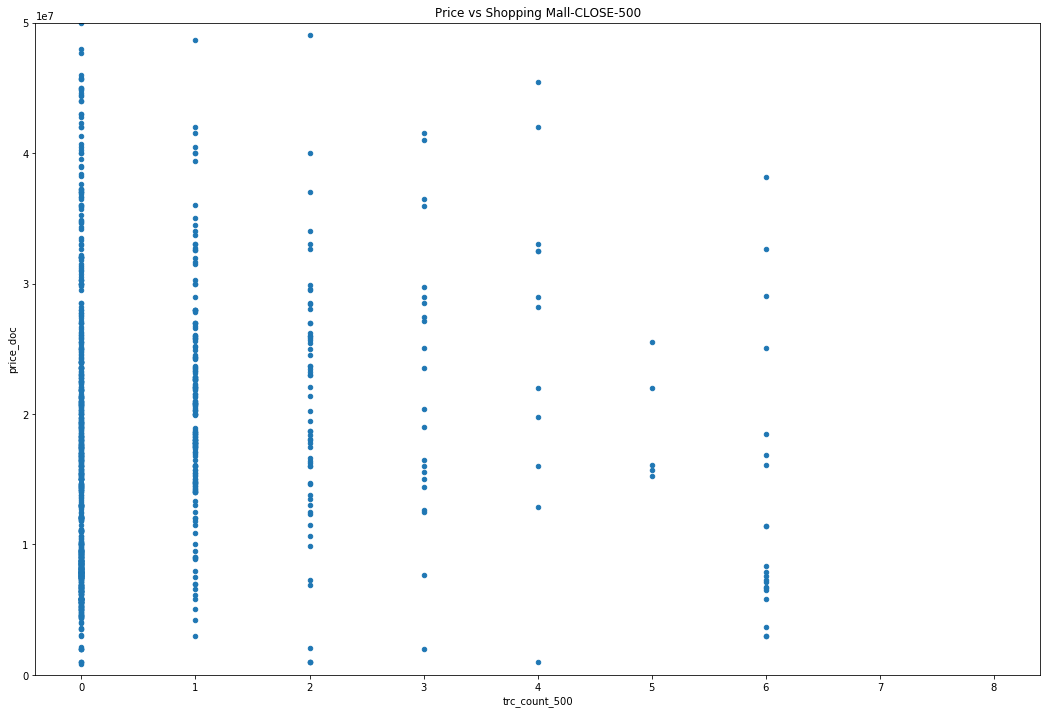

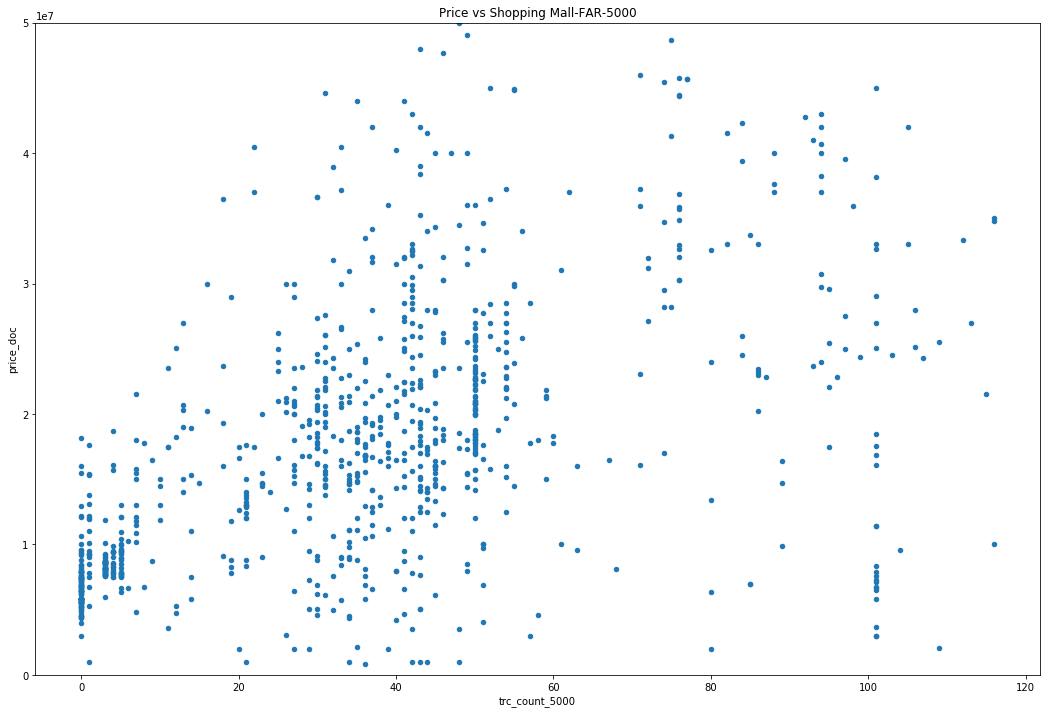

In [115]:
df2 = df[(df["full_sq"]>=100) & (df["full_sq"]<=200)]
df2.plot.scatter(x='office_count_5000', y='price_doc',title="Price vs Office Count",logy=False,ylim=[0,8e7],xlim=[0,100])
df2.plot.scatter(x='cafe_count_5000_price_500', y='price_doc',title="Price vs Caffe-500 Count",logy=False,ylim=[0,5e7])
df2.plot.scatter(x='cafe_count_5000_price_1000', y='price_doc',title="Price vs Cafe-1000 Count",logy=False,ylim=[0,5e7])
df2.plot.scatter(x='cafe_count_5000_price_high', y='price_doc',title="Price vs Cafe-high Count",logy=False,ylim=[0,5e7])


df2.plot.scatter(x='market_count_500', y='price_doc',title="Price vs Market-500-VERY CLOSE Count",logy=False,ylim=[0,5e7])
df2.plot.scatter(x='market_count_1500', y='price_doc',title="Price vs Market Count-1500",logy=False,ylim=[0,5e7])
df2.plot.scatter(x='market_count_3000', y='price_doc',title="Price vs Market Count-3000",logy=False,ylim=[0,5e7])
df2.plot.scatter(x='market_count_5000', y='price_doc',title="Price vs Market Count-5000-FAR",logy=False,ylim=[0,5e7])

df2.plot.scatter(x='trc_count_500', y='price_doc',title="Price vs Shopping Mall-CLOSE-500",logy=False,ylim=[0,5e7])
df2.plot.scatter(x='trc_count_5000', y='price_doc',title="Price vs Shopping Mall-FAR-5000",logy=False,ylim=[0,5e7])
mplt.rcParams['figure.figsize'] = (18,12)
plt.figure();
plt.show();

### Number of Missing values per column

In [76]:
# Missing value count per column
print(df.isnull().sum())
# Number of rows and column in df
print(df.shape)

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

In [91]:
# Count of Nan in this column
df["max_floor"].isnull().sum()

# Count of All distinct values in this column
df["max_floor"].value_counts(dropna=False)
# Total count of all Nans
# df.isnull().values.sum()
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 
print(missing_values_table(df))
def unique_values_per_column(df):
    unique_counts = {}
    for idx in df.isnull().sum().index.values:
        cnt=len(df[idx].unique())
        unique_counts[idx]=cnt
    unique_ctr = pd.Series(unique_counts)
    unique_ctr_2 = unique_ctr.rename(columns={0: '# Unique Values'})
    return unique_ctr_2

unique_values_per_column(df)

                                       Missing Values  % of Total Values
id                                                  0           0.000000
timestamp                                           0           0.000000
full_sq                                             0           0.000000
life_sq                                          6383          20.947786
floor                                             167           0.548062
max_floor                                        9572          31.413475
material                                         9572          31.413475
build_year                                      13605          44.649011
num_room                                         9572          31.413475
kitch_sq                                         9572          31.413475
state                                           13559          44.498047
product_type                                        0           0.000000
sub_area                                           

0_13_all                        146
0_13_female                     146
0_13_male                       144
0_17_all                        145
0_17_female                     146
0_17_male                       146
0_6_all                         146
0_6_female                      145
0_6_male                        144
16_29_all                       145
16_29_female                    146
16_29_male                      145
7_14_all                        146
7_14_female                     145
7_14_male                       142
ID_big_road1                     48
ID_big_road2                     58
ID_bus_terminal                  14
ID_metro                        223
ID_railroad_station_avto        133
ID_railroad_station_walk        134
ID_railroad_terminal              8
additional_education_km       11843
additional_education_raion       12
area_m                          146
basketball_km                 11852
big_church_count_1000            24
big_church_count_1500       

In [79]:
df["office_count_5000"].tail()

30466     44
30467    617
30468      1
30469     39
30470     15
Name: office_count_5000, dtype: int64